In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [12]:
x_0 = tf.random.normal([20], 3, 1 )
x_1 = tf.random.normal([20],5.5,1)
y_0 = tf.zeros(20)
y_1 = tf.ones(20)

x=tf.concat([x_0,x_1],0)
y=tf.concat([y_0,y_1],0)

print(x.shape)
print(y.shape)
print(x_0.shape)
print(x)
print(y)



(40,)
(40,)
(20,)
tf.Tensor(
[1.8987797 4.5457516 3.383644  2.1203423 1.7753278 2.018879  3.087808
 2.7967396 2.4418437 2.279456  2.3740077 2.284974  2.6516457 2.66353
 3.1825757 4.1085954 4.279659  2.9785242 2.6803112 3.3733256 5.903088
 4.411979  5.4369044 6.8365564 6.21176   5.0107136 4.735779  4.4627514
 4.248066  5.5212245 4.948624  3.7568302 5.164639  4.4573326 6.509138
 6.7362537 4.816311  6.173609  5.079377  4.4586973], shape=(40,), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


In [17]:
def plot_graph(X,Y, X_hat=None, Y_hat=None, str_title = None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None :
        plt.title(str_title, fontsize=20, pad=20)
  
    plt.plot(X,Y, ls='none' , marker ='x')

    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)

    plt.tick_params(axis='both', labelsize=14)


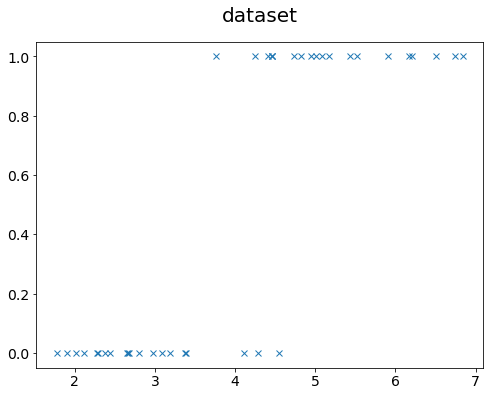

In [18]:
plot_graph(x,y,str_title ='dataset')

In [5]:
W =tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b =tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

def cross_entropy(y_pred, y_true): 
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.) #log term에 0이 들어가지 않도록 0~1e-9보다 작은 수가 pred 값으로 들어오면 1e-9 로 pred 값 대체해줌
    return  -tf.reduce_sum(y_true*tf.math.log(y_pred)+(1-y_true)*(tf.math.log(1-y_pred)))


In [15]:
lr = 0.001
optimizer = tf.optimizers.SGD(lr) # optimizer 정의, Stochastic Gradient Descent를 쓴다는 의미에서 SGD.
                                  # 보다 다양한 optimizer의 종류는 추후 배울 것

def run_optimization(): # linear Regression시와 거의 같은 형태지만, loss 계산과 업데이트할 파라미터가 다르다.
    with tf.GradientTape() as g: #GradientTape, 즉, g에 loss 계산 과정 저장. why? W, b와 loss 사이의 관계를 알아야 W, b로 loss 미분이 가능해지기 때문 
        pred = 1/(1+tf.exp(-1*(W*x+b))) 
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W, b]) #loss를 w, b로 미분하고, 미분한 값을 gradients에 저장
    optimizer.apply_gradients(zip(gradients, [W, b])) # 위에서 계산한 gradients, 즉 미분값을 미분한 파라미터와 묶어서(zip) 넣어주면
                                                      # (즉, loss를 W로 미분한 값은 W와, b로 미분한 값은 b와 묶어서 입력해주면)
                                                      # 해당 셀 첫줄에 정의한 optimizer가 미분값과 learning rate를 이용해 파라미터 업데이트(학습)

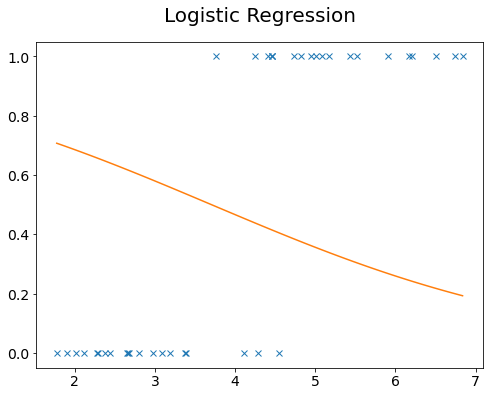

In [8]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat= 1/(1+tf.exp(-1*(W*x_fl+b))),str_title="Logistic Regression" )

In [19]:
training_steps = 1000
display_step = 50 
end_step =0
for step in range(1, training_steps+1) :
    run_optimization()
    
    if step % display_step == 0 :  # 학습 기다리는 동안 학습이 잘 되고 있는지 확인할 수 있도록 중간과정 출력
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        print("step: ", step, ", loss:", loss.numpy())

end_step = step 

step:  50 , loss: 15.597817
step:  100 , loss: 15.268059
step:  150 , loss: 14.9609375
step:  200 , loss: 14.674318
step:  250 , loss: 14.406309
step:  300 , loss: 14.155231
step:  350 , loss: 13.91959
step:  400 , loss: 13.698055
step:  450 , loss: 13.489439
step:  500 , loss: 13.292678
step:  550 , loss: 13.106815
step:  600 , loss: 12.930996
step:  650 , loss: 12.764447
step:  700 , loss: 12.606466
step:  750 , loss: 12.456427
step:  800 , loss: 12.313752
step:  850 , loss: 12.177925
step:  900 , loss: 12.048472
step:  950 , loss: 11.924956
step:  1000 , loss: 11.806992


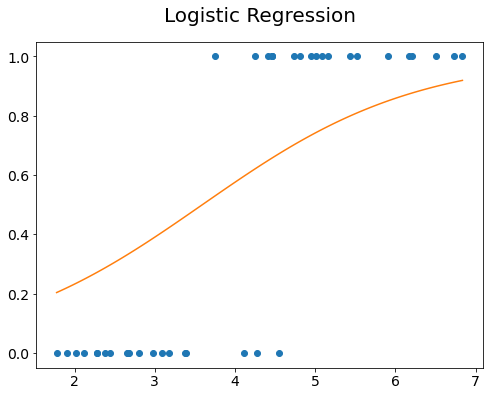

In [23]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat= 1/(1+tf.exp(-1*(W*x_fl+b))),str_title="Logistic Regression" )

In [24]:
training_steps = 1000
display_step = 200 
for step in range(end_step + 1 , end_step + training_steps +1 ) :
  run_optimization()

  if step % display_step == 0 : 
    pred = 1/(1+tf.exp(-1*(W*x+b)))
    loss = cross_entropy(pred, y)
    print("step: ", step, ", loss:", loss.numpy())

end_step = step 

step:  1200 , loss: 14.406309
step:  1400 , loss: 13.48944
step:  1600 , loss: 12.764447
step:  1800 , loss: 12.177927
step:  2000 , loss: 11.694215


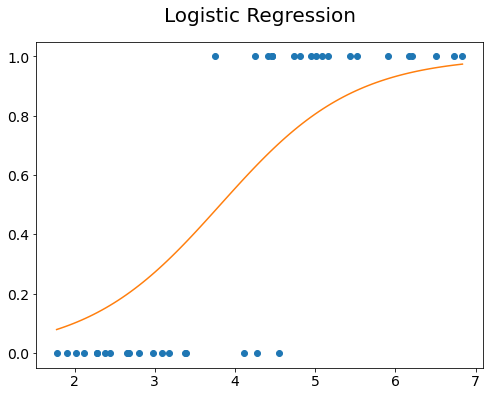

In [25]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat= 1/(1+tf.exp(-1*(W*x_fl+b))),str_title="Logistic Regression" )

In [26]:
training_steps = 10000
display_step = 500 
for step in range(end_step + 1 , end_step + training_steps +1 ) :
  run_optimization()

  if step % display_step == 0 : 
    pred = 1/(1+tf.exp(-1*(W*x+b)))
    loss = cross_entropy(pred, y)
    print("step: ", step, ", loss:", loss.numpy())

end_step = step 

step:  2500 , loss: 10.790524
step:  3000 , loss: 10.164068
step:  3500 , loss: 9.704685
step:  4000 , loss: 9.35364
step:  4500 , loss: 9.076826
step:  5000 , loss: 8.853104
step:  5500 , loss: 8.668673
step:  6000 , loss: 8.514135
step:  6500 , loss: 8.382878
step:  7000 , loss: 8.270101
step:  7500 , loss: 8.172242
step:  8000 , loss: 8.086597
step:  8500 , loss: 8.011078
step:  9000 , loss: 7.944046
step:  9500 , loss: 7.8841996
step:  10000 , loss: 7.830486
step:  10500 , loss: 7.7820497
step:  11000 , loss: 7.7381845
step:  11500 , loss: 7.698303
step:  12000 , loss: 7.6619205


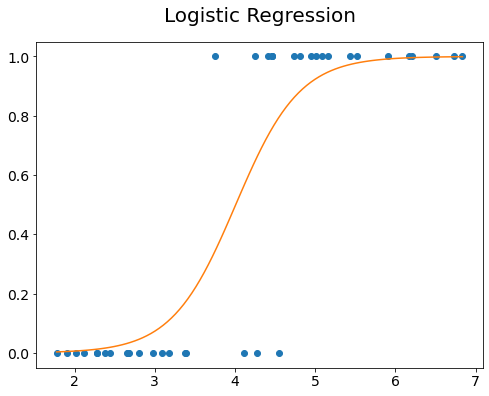

In [27]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat= 1/(1+tf.exp(-1*(W*x_fl+b))),str_title="Logistic Regression" )